In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh as bh
from textblob import TextBlob
import plotly.graph_objects as go



In [2]:
df = pd.read_csv("WomensClothingECommerceReviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


* Remove the "Title feature"
* Remove the row where "Review Text" were missing
* clean "Review Text" column.
* Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means negative sentiment.
* create new feature for the length of the review
* create new feature for the word count of the review.

In [5]:
df.shape

(23486, 11)

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
#drop unnamed and title
df = pd.read_csv("WomensClothingECommerceReviews.csv")
def dropColumn(DataFrame,columnNameList):
    '''This Function Take Two Arguments:
            1 ->> DataFrame(pandas dataframe) from which you want to delete the column
            2 ->> Column name List
        returns True success
    '''
    for col in columnNameList:
        DataFrame.drop(col,axis=1,inplace=True)
        print("{} sucessFully Deleted".format(col))
        
    return True



#f.drop('Unnamed: 0',axis =1,inplace=True)
#f.drop('Title',axis=1,inplace=True)
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [8]:
help(dropColumn)
dropColumn(df,["Unnamed: 0","Title"])

Help on function dropColumn in module __main__:

dropColumn(DataFrame, columnNameList)
    This Function Take Two Arguments:
        1 ->> DataFrame(pandas dataframe) from which you want to delete the column
        2 ->> Column name List
    returns True success

Unnamed: 0 sucessFully Deleted
Title sucessFully Deleted


True

In [9]:
df = df[~df['Review Text'].isnull()]
print(df.shape)

(22641, 9)


In [10]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)","")
    ReviewText = ReviewText.str.replace("(<a).*(>)","")
    ReviewText = ReviewText.str.replace("(&amp)","")
    ReviewText = ReviewText.str.replace("(&gt)","")
    ReviewText = ReviewText.str.replace("(&lt)","")
    ReviewText = ReviewText.str.replace("(\xa0)"," ")
    return ReviewText

In [11]:
TextBlob("i  am good").sentiment.polarity
text = "i am divay"
len(text.split())

3

In [12]:
df['Review Text'] = preprocess(df["Review Text"])
df['polarity'] = df['Review Text'].map(lambda text:TextBlob(text).sentiment.polarity)
df['word_count'] = df['Review Text'].map(lambda text:len(text.split()))
df['review_len'] = df['Review Text'].astype(str).apply(len)

In [13]:
df.head(2)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303


In [14]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity==1,["Review Text"]].sample(5).values
for c in cl:
    print(c[0])


5 random reviews with the highest positive sentiment polarity: 

This is the perfect holiday dress. my best purchase of the season!
The print is awesome !
This is a great blouse for all shapes!   you can wear it under a suit or with jeans!
Fits perfect.
So beautiful! i got the xs and it fits tts! it goes with everything! perfect weekend addition!


In [15]:
print('5 random reviews with the nutral sentiment polarity: \n')
cl = df.loc[df.polarity==0,["Review Text"]].sample(5).values
for c in cl:
    print(c[0])


5 random reviews with the nutral sentiment polarity: 

Just received pants and even though they are labeled "petite" they are not. the inseam is 28 for a waist size 26, which is not what the description states.
I like the tunic but there are no care instructions in the garment. if i wash it once and it shrinks or the dye runs it will be going back. please send care instructions.
These shorts are divine. the fabric is sturdy and there is a weave of sparkle that i did not perceive from the picture.
I bought this shirt along with a matching vest and duster........love it!
The print doesn't necessarily works for everybody.


In [16]:
print('5 random reviews with the highest negative sentiment polarity: \n')
cl = df.loc[df.polarity==-0.97500000000000009,["Review Text"]].sample(1).values
for c in cl:
    print(c[0])


5 random reviews with the highest negative sentiment polarity: 

Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse


## Univariate Visualization

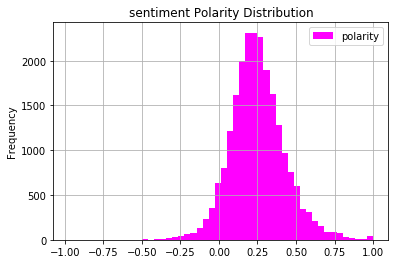

In [17]:
df['polarity'].plot(
    kind = 'hist',
    grid=True,
    colormap='spring',
    legend=True,
    x = "polarity",
    y="count",
    bins = 50,
    title='sentiment Polarity Distribution'
    
    
)

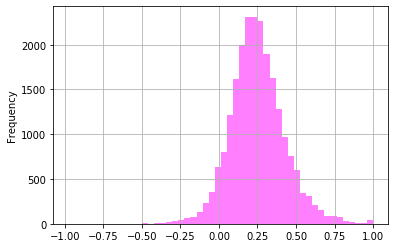

In [18]:
#anather method to draw histogram 
df['polarity'].plot.hist(bins=50,
                         alpha=0.5,
                         grid=True,
                         colormap='spring'
                        )

Text(0, 0.5, 'count')

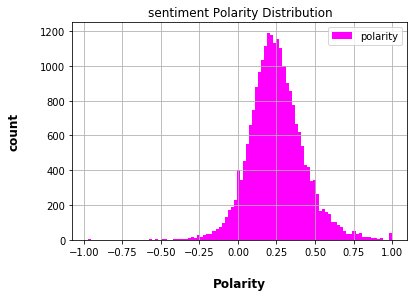

In [19]:
x = df['polarity'].plot(
    kind = 'hist',
    grid=True,
    colormap='spring',
    legend=True,
    bins = 100,
    title='sentiment Polarity Distribution'
)
x.set_xlabel("Polarity", labelpad=20, weight='bold', size=12)
x.set_ylabel("count", labelpad=20, weight='bold', size=12)

   


Text(0, 0.5, 'count')

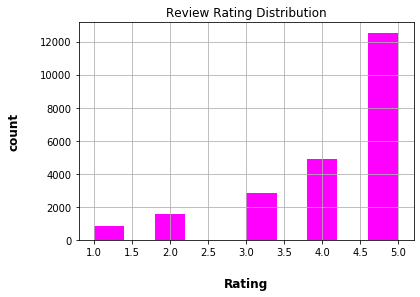

In [20]:
ax = df['Rating'].plot(
    kind = 'hist',
    colormap = 'spring',
    grid = "true",
    title = "Review Rating Distribution"
    )
ax.set_xlabel("Rating", labelpad=20, weight='bold', size=12)
ax.set_ylabel("count", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'count')

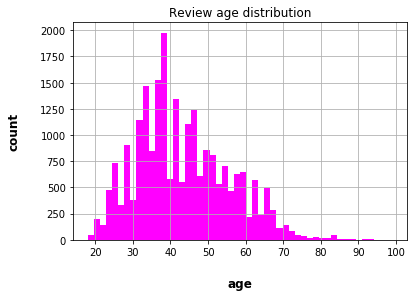

In [21]:
ax = df['Age'].plot(
    kind="hist",
    grid = "true",
    colormap = "spring",
    bins = 50,
    title = 'Review age distribution'
)
ax.set_xlabel("age", labelpad=20, weight='bold', size=12)
ax.set_ylabel("count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'count')

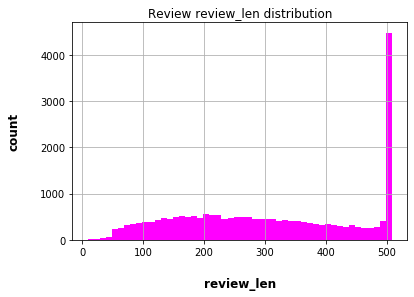

In [22]:
ax = df['review_len'].plot(
    kind="hist",
    grid = "true",
    colormap = "spring",
    bins = 50,
    title = 'Review review_len distribution'
)
ax.set_xlabel("review_len", labelpad=20, weight='bold', size=12)
ax.set_ylabel("count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'count')

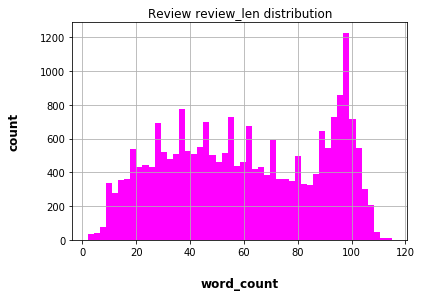

In [23]:
ax = df['word_count'].plot(
    kind="hist",
    grid = "true",
    colormap = "spring",
    bins = 50,
    title = 'Review review_len distribution'
)
ax.set_xlabel("word_count", labelpad=20, weight='bold', size=12)
ax.set_ylabel("count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Count')

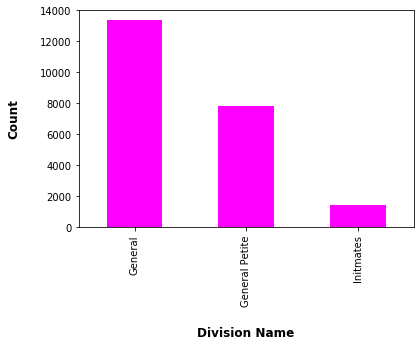

In [24]:
ax = df.groupby('Division Name').count()['Clothing ID'].plot(
    kind="bar",
    colormap="spring"
)
ax.set_xlabel("Division Name",labelpad=20,weight='bold',size=12)
ax.set_ylabel("Count",labelpad=20,weight='bold',size=12)

Text(0, 0.5, 'count')

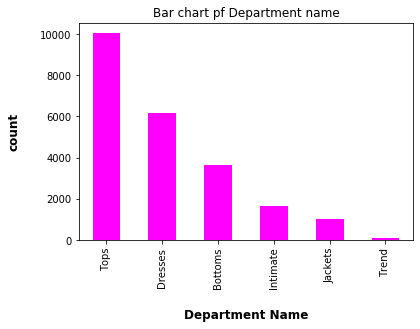

In [25]:
ax = df.groupby('Department Name').count()['Clothing ID'].sort_values(ascending=False).plot(
    kind = 'bar',
    colormap = 'spring',
    title = 'Bar chart pf Department name'
)
ax.set_xlabel("Department Name",labelpad=20,weight='bold',size=12)
ax.set_ylabel("count",labelpad=20,weight='bold',size=12)

Text(0, 0.5, 'count')

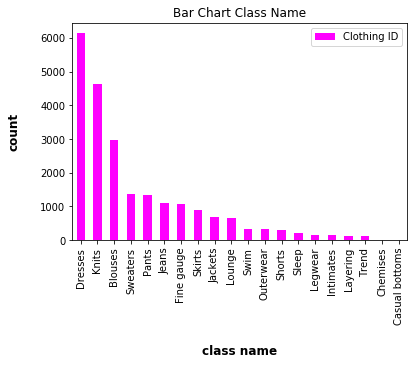

In [26]:
ax = df.groupby('Class Name').count()['Clothing ID'].sort_values(ascending=False).plot(
    kind='bar',
    colormap='spring',
    title='Bar Chart Class Name',
    legend = True
)
ax.set_xlabel("class name",labelpad=20,weight='bold',size=12)
ax.set_ylabel("count",labelpad=20,weight='bold',size=12)


### N gram visualization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from nltk.corpus import stopwords
def get_top_n_words(corpus,n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]

def get_top_n_words_withoutStopWords(corpus,n = None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]
def get_top_n_words_twoGram(corpus,n = None):
    vec = CountVectorizer( ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]
def get_top_n_words_twoGram_withoutStopWords(corpus,n = None):
    vec = CountVectorizer( ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]
def get_top_n_words_triGram(corpus,n = None):
    vec = CountVectorizer( ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]
def get_top_n_words_triGram_withoutStopWords(corpus,n = None):
    vec = CountVectorizer( ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [29]:
common_words = get_top_n_words(df['Review Text'],20)
for words,count in common_words:
    print(words,count)

the 76166
it 49284
and 49009
is 30641
this 25762
to 24583
in 20723
but 16556
on 15328
for 14000
of 13429
with 12803
was 12221
so 12023
my 11028
dress 10567
that 10014
not 9799
love 8951
size 8772


Text(0, 0.5, 'count')

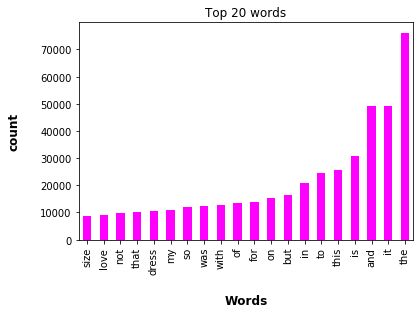

In [30]:
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

Text(0, 0.5, 'count')

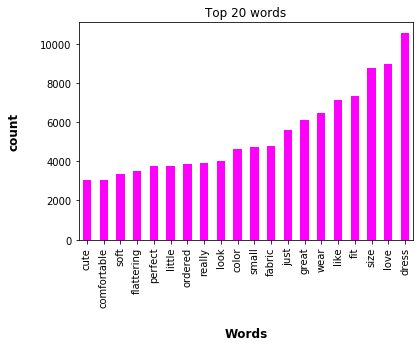

In [31]:
common_words = get_top_n_words_withoutStopWords(df['Review Text'],20)
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

Text(0, 0.5, 'count')

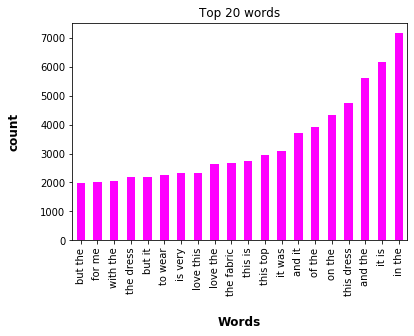

In [32]:
common_words = get_top_n_words_twoGram(df['Review Text'],20)
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

Text(0, 0.5, 'count')

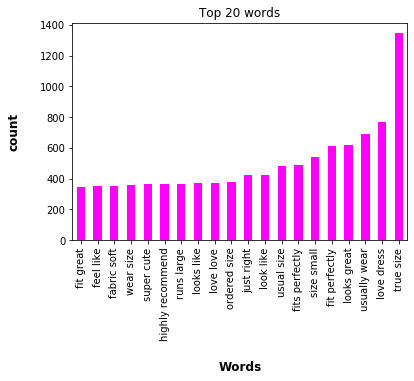

In [33]:
common_words = get_top_n_words_twoGram_withoutStopWords(df['Review Text'],20)
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

Text(0, 0.5, 'count')

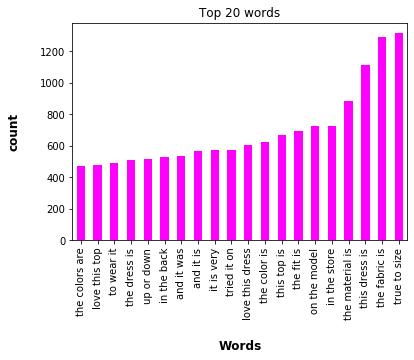

In [34]:
common_words = get_top_n_words_triGram(df['Review Text'],20)
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

Text(0, 0.5, 'count')

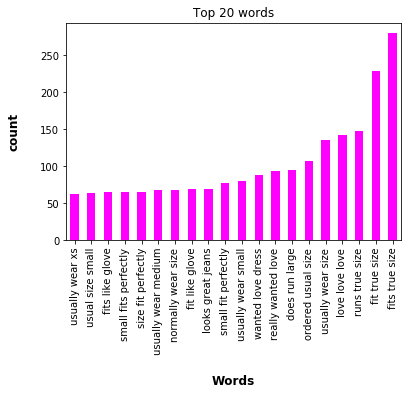

In [35]:
common_words = get_top_n_words_triGram_withoutStopWords(df['Review Text'],20)
df1 = pd.DataFrame(common_words, columns=['ReviewText','count'])
ax = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot(
    kind="bar",
    title = "Top 20 words",
    colormap = "spring"
)
ax.set_xlabel("Words",labelpad = 20,weight='bold',size=12)
ax.set_ylabel("count",labelpad = 20,weight='bold',size=12)

# POS TAGs


In [36]:
blob = TextBlob(str(df['Review Text']))
pos_df = pd.DataFrame(blob.tags,columns=['words','pos'])
pos_df = pos_df.pos.value_counts()[:20]

In [37]:
pos_df.head(2)

NN    131
DT     88
Name: pos, dtype: int64

Text(0, 0.5, 'Count')

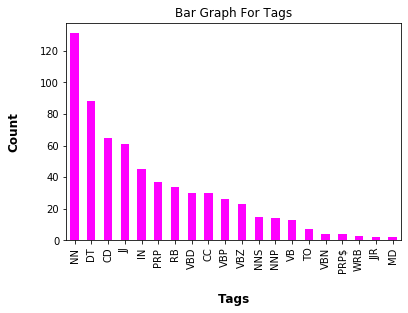

In [38]:
ax = pos_df.plot(
    kind = 'bar',
    title = 'Bar Graph For Tags',
    colormap = "spring"
)
ax.set_xlabel("Tags",labelpad = 20,weight='bold',size =12)
ax.set_ylabel("Count",labelpad=20,weight='bold',size=12)